# Lipid analysis

## Lindemann index

In [1]:
import numpy as np
import MDAnalysis as mda 
import matplotlib.pyplot as plt 
import seaborn as sns
from MDAnalysis.analysis import distances

In [2]:
u = mda.Universe('sa.gro','nojump.xtc')

/home/akshay/apps/miniconda3/envs/py311/lib/python3.11/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: G
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/akshay/apps/miniconda3/envs/py311/lib/python3.11/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: R
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


In [3]:
traj_mol_li = []
for time in range(0,3200,20):    
    mol_li = []
    selections = ['resname DSPC','resname CHOL','resname S1D']
    for s in selections:
        block = []
        for ts in u.trajectory[time:time+20]:
            a = u.select_atoms(s)
            distance_array = []
            for i in a.residues:
                distance_array.append(distances.self_distance_array(i.atoms.positions))
            block.append(distance_array)
        block = np.array(block)
        block_sq = block**2
        mol_li.append((((block_sq.mean(axis=0) - block.mean(axis=0)**2)**0.5)/block.mean(axis=0)).mean(axis=1))
    traj_mol_li.append(mol_li)

In [4]:
dspc_li = []
chol_li = []
s1d_li = []
formulation_li = []
for i in traj_mol_li:
    formulation_li.append(np.concatenate(i).mean())
    dspc_li.append(i[0].mean())
    chol_li.append(i[1].mean())
    s1d_li.append(i[2].mean())

In [5]:
np.save('dspc_chol_sm102_li.npy',formulation_li) 

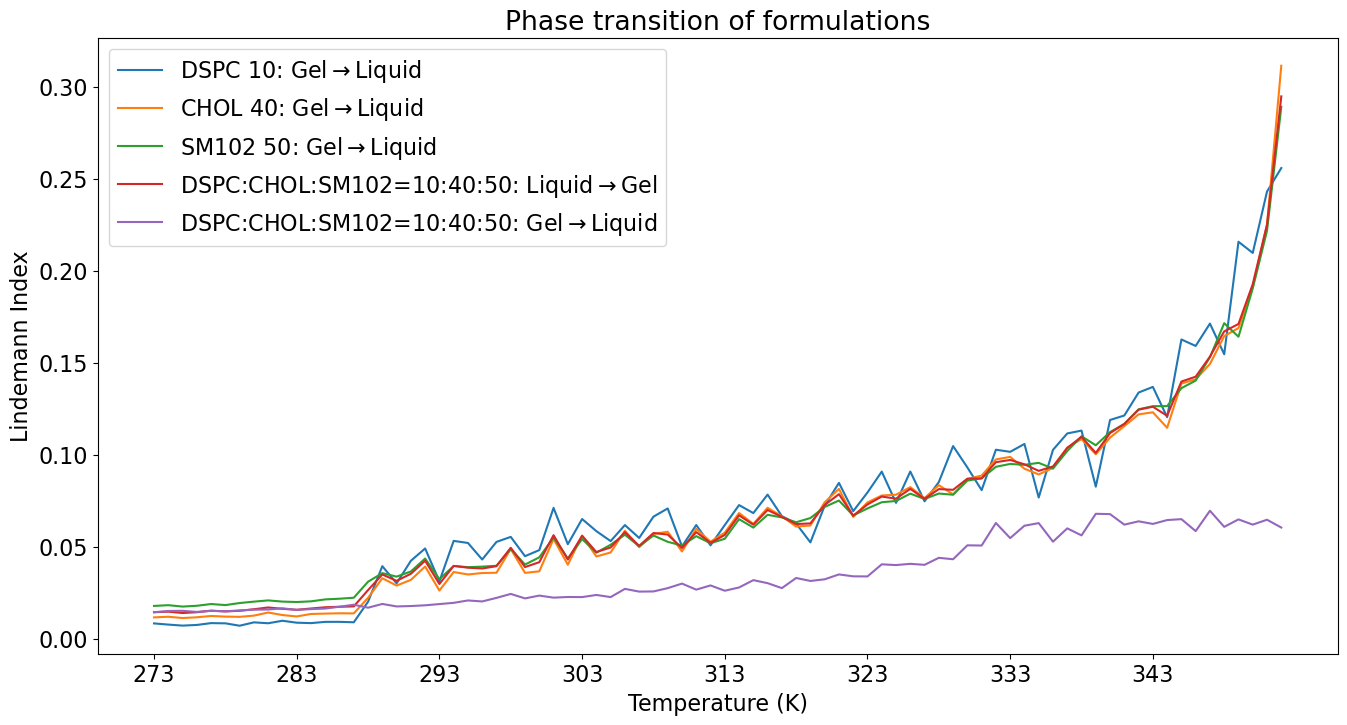

In [6]:
plt.figure(figsize=(16,8))
plt.rcParams['font.size'] = 16
plt.plot(dspc_li[80:0:-1], label=r'DSPC 10: Gel$\to$Liquid')
plt.plot(chol_li[80:0:-1], label=r'CHOL 40: Gel$\to$Liquid')
plt.plot(s1d_li[80:0:-1], label=r'SM102 50: Gel$\to$Liquid')
plt.plot(formulation_li[80:0:-1], label=r'DSPC:CHOL:SM102=10:40:50: Liquid$\to$Gel')
plt.plot(formulation_li[80:], label=r'DSPC:CHOL:SM102=10:40:50: Gel$\to$Liquid')
#plt.plot(formulation_li[80:], label='Formulation Liquid-->Gel')
plt.xlabel('Temperature (K)')
plt.ylabel('Lindemann Index')
plt.xticks(range(0,80,10),[str(i) for i in range(273,353,10)])
plt.title('Phase transition of formulations')
plt.legend()

# Plot across simulations for components

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#dspc_chol_sm102_li = np.load('dspc_chol_sm102_li.npy')
dspc_li = np.load('../dspc/dspc_li.npy')
chol_li = np.load('../chol/chol_li.npy')
s1d_li = np.load('../sm102/s1d_li.npy') # sm102
tzp_li = np.load('../tzp_1/tzp_li.npy') # Trip-zip 2
#dspc_chol_tzp_li = np.load('../dspc_chol_tzp2/dspc_chol_tzp_li.npy') # DSPC:CHOL:Trip-zip 2=10:40:50

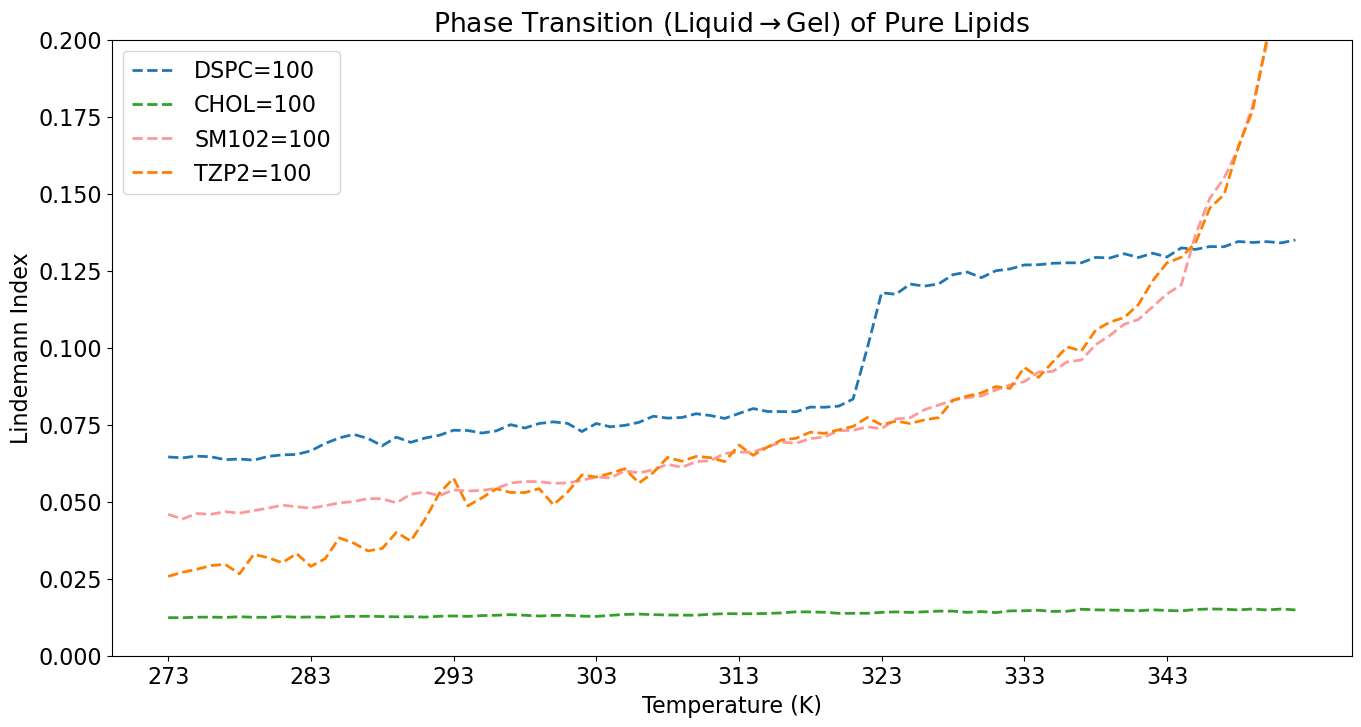

In [11]:
# Choose a color palette
palette = sns.color_palette("Paired", 8)

plt.figure(figsize=(16,8))
plt.rcParams['font.size'] = 16
plt.plot(dspc_li[80:0:-1], label=r'DSPC=100', linestyle='--', linewidth=2, color=palette[1])
plt.plot(chol_li[80:0:-1], label=r'CHOL=100', linestyle='--', linewidth=2, color=palette[3])
plt.plot(s1d_li[80:0:-1], label=r'SM102=100', linestyle='--', linewidth=2, color=palette[4])
plt.plot(tzp_li[80:0:-1], label=r'TZP2=100', linestyle='--', linewidth=2, color=palette[7])
#plt.plot(dspc_chol_sm102_li[80:0:-1], label=r'DPSC:CHOL:SM102=10:40:50', linewidth=3, color=palette[4])
#plt.plot(dspc_chol_tzp_li[80:0:-1], label=r'DPSC:CHOL:TZP2=10:40:50', linewidth=3, color=palette[5])
plt.xlabel('Temperature (K)')
plt.ylabel('Lindemann Index')
plt.xticks(range(0,80,10), [str(i) for i in range(273,353,10)])
plt.title(r'Phase Transition (Liquid$\to$Gel) of Pure Lipids')
plt.legend()
plt.ylim([0,0.2])
plt.savefig('purelipids_phase_transition.png', dpi=600, bbox_inches='tight', facecolor='white')

# Plot formulations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dspc_chol_sm102_1_li = np.load('dspc_chol_sm102_li.npy')
dspc_chol_sm102_2_li = np.load('../dspc_chol_sm102_2/dspc_chol_sm102_2_li.npy')
dspc_chol_sm102_3_li = np.load('../dspc_chol_sm102_3/dspc_chol_sm102_3_li.npy')
dspc_chol_sm102_4_li = np.load('../dspc_chol_sm102_4/dspc_chol_sm102_4_li.npy')
dspc_chol_tzp_1_li = np.load('../dspc_chol_tzp2/dspc_chol_tzp_li.npy') # DSPC:CHOL:Trip-zip 2=10:40:50
dspc_chol_tzp_2_li = np.load('../dspc_chol_tzp2_2/dspc_chol_tzp_2_li.npy') # DSPC:CHOL:Trip-zip 2=10:40:50
dspc_chol_tzp_3_li = np.load('../dspc_chol_tzp2_3/dspc_chol_tzp_3_li.npy') # DSPC:CHOL:Trip-zip 2=10:40:50
dspc_chol_tzp_4_li = np.load('../dspc_chol_tzp2_4/dspc_chol_tzp_4_li.npy') # DSPC:CHOL:Trip-zip 2=10:40:50
dspc_chol_sm102_li = (dspc_chol_sm102_1_li+dspc_chol_sm102_2_li+dspc_chol_sm102_3_li+dspc_chol_sm102_4_li)/4
dspc_chol_tzp_li = (dspc_chol_tzp_1_li+dspc_chol_tzp_2_li+dspc_chol_tzp_3_li+dspc_chol_tzp_4_li)/4

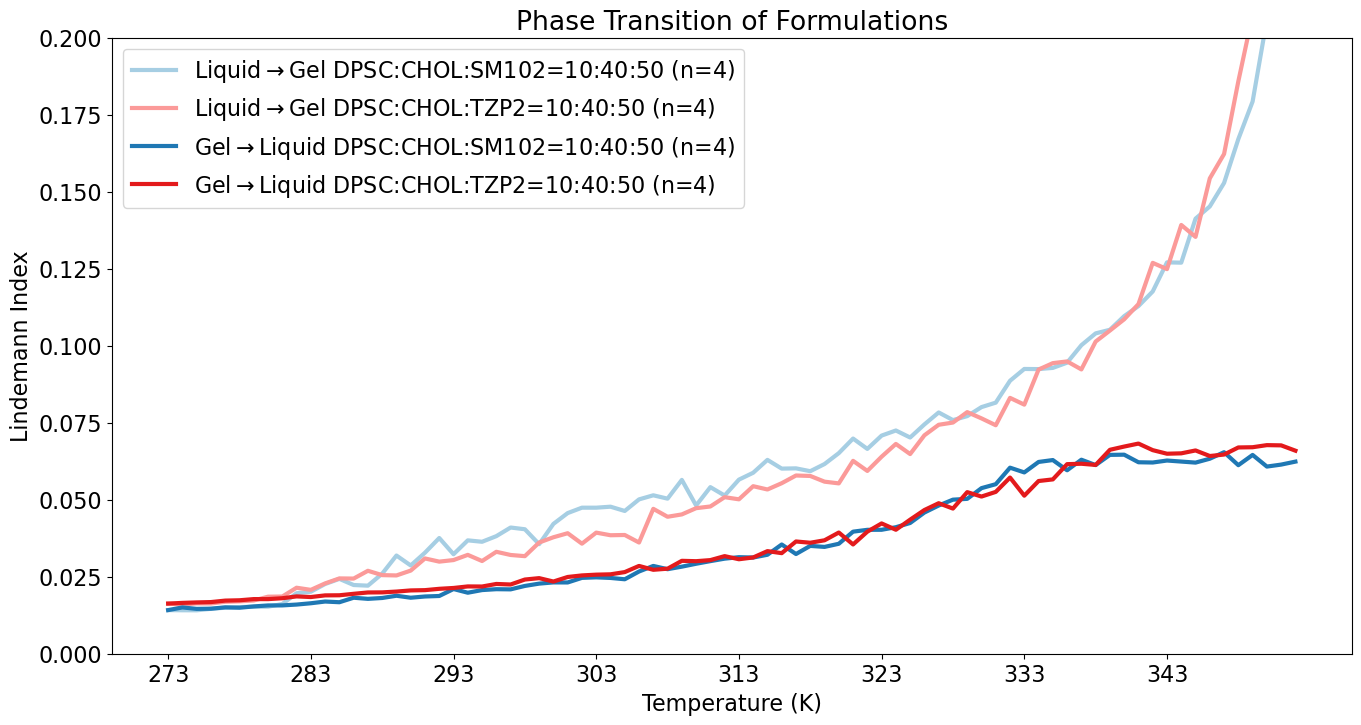

In [5]:
# Choose a color palette
palette = sns.color_palette("Paired", 6)

plt.figure(figsize=(16,8))
plt.rcParams['font.size'] = 16
plt.plot(dspc_chol_sm102_li[80:0:-1], label=r'Liquid$\to$Gel DPSC:CHOL:SM102=10:40:50 (n=4)', linewidth=3, color=palette[0])
plt.plot(dspc_chol_tzp_li[80:0:-1], label=r'Liquid$\to$Gel DPSC:CHOL:TZP2=10:40:50 (n=4)', linewidth=3, color=palette[4])
plt.plot(dspc_chol_sm102_li[80:], label=r'Gel$\to$Liquid DPSC:CHOL:SM102=10:40:50 (n=4)', linewidth=3, color=palette[1])
plt.plot(dspc_chol_tzp_li[80:], label=r'Gel$\to$Liquid DPSC:CHOL:TZP2=10:40:50 (n=4)', linewidth=3, color=palette[5])
plt.xlabel('Temperature (K)')
plt.ylabel('Lindemann Index')
plt.xticks(range(0,80,10), [str(i) for i in range(273,353,10)])
plt.title(r'Phase Transition of Formulations')
plt.legend()
plt.ylim([0,0.2])
plt.savefig('formulation_phase_transition.png', dpi=600, bbox_inches='tight', facecolor='white')